<a href="https://colab.research.google.com/github/DrMiracle/Colab-Projects/blob/main/data%20analysis/many%20tests%20ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2_contingency
import random,math

In [ ]:
df=pd.read_excel("ex 2.xlsx")
data = df['var2']
n = np.sum(range(len(data)))
data,n

(0      0.662
 1      0.468
 2      0.430
 3      0.296
 4      0.597
        ...  
 105    0.767
 106    0.527
 107    0.609
 108    0.803
 109    0.651
 Name: var2, Length: 110, dtype: float64, 5995)

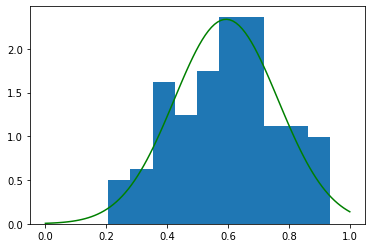

In [ ]:
a, sigma  =scipy.stats.distributions.norm.fit(data)
ix = np.linspace(0,1,100)
N_fitted_data = scipy.stats.distributions.norm.pdf(ix, a, sigma)
plt.hist(data, density=True)
plt.plot(ix,N_fitted_data,'g')

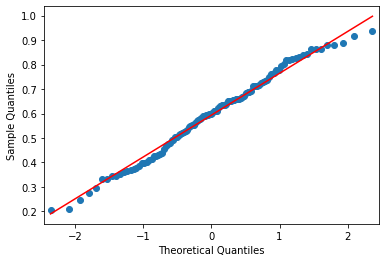

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(data, line='s')
pyplot.show()

Shapiro-Wilk Test. У якості статистики тесту обирається W=
\begin{align}
W = \frac{(\sum_{i=1}^n a_ix_{(i)})^2}{\sum_{i=1}^n (x_i-\bar{x})^2}
\end{align}
Критерій полягає у наступному: тестуємо нашу вибірку на умову(нульова гіпотеза), що вибірка розподілена нормально.

In [ ]:
# code for Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(data)
print('stat W=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
	print('The null hypothesis can be rejected. Probably not Gaussian')
else:
	print('The null hypothesis cannot be rejected. Not enough evidence to say data is not normal. Probably Gaussian')



stat W=0.985, p=0.240
The null hypothesis cannot be rejected. Not enough evidence to say data is not normal. Probably Gaussian


D’Agostino’s K^2 Test. У якості статистики обирається дослідження ексцеси та асиметрії. K^2 Test рахує ексцесу та асиметрію заданої вибірки, потім порівнює з очікуваними значеннями(у випадку якщо вибірка нормально розподілена).

In [ ]:
# code for К'Test
k2, p = scipy.stats.normaltest(data)
alpha = 0.05
print('stat K_2=%.3f, p=%.3f' % (k2, p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis can be rejected. Probably not Gaussian")
else:
     print("The null hypothesis cannot be rejected. Probably Gaussian")

stat K_2=3.941, p=0.139
The null hypothesis cannot be rejected. Probably Gaussian


Далі застосуємо Тест Пірсона Хі-квадрат. Статистика використовує значення хі-квадрат, яке вимірює різницю між спостереженими та очікуваними частотами, використовуючи нульову гіпотезу.

In [ ]:
#chisquare Pearson Test
from scipy.stats import chisquare
Statistics_Xi_2, p=chisquare(data)
alpha = 0.05
print('stat Xi_2=%.3f, p=%.3f' % (Statistics_Xi_2, p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis can be rejected. Probably not Gaussian")
else:
     print("The null hypothesis cannot be rejected. Probably Gaussian")

stat Xi_2=5.401, p=1.000
The null hypothesis cannot be rejected. Probably Gaussian


Перевіримо гіпотезу вручну.

In [ ]:
def normal_distribution(x):
  return 1/np.sqrt(2*math.pi) * np.exp(-pow(x,2) / 2)

In [ ]:
mean = np.mean(data)
var = np.var(data)
std = np.std(data)
mean, var, std

(0.593709090909091, 0.029151260826446285, 0.17073740312669128)

In [ ]:
df=pd.read_excel("ex 2.xlsx")
verifying_data = np.sort(df['var2'])
verifying_data

array([0.206, 0.21 , 0.245, 0.277, 0.296, 0.332, 0.332, 0.344, 0.346,
       0.355, 0.363, 0.365, 0.371, 0.375, 0.377, 0.384, 0.398, 0.399,
       0.402, 0.412, 0.416, 0.425, 0.428, 0.43 , 0.434, 0.437, 0.455,
       0.468, 0.477, 0.479, 0.491, 0.492, 0.503, 0.506, 0.513, 0.518,
       0.522, 0.523, 0.527, 0.533, 0.543, 0.551, 0.552, 0.555, 0.562,
       0.568, 0.573, 0.579, 0.58 , 0.588, 0.591, 0.593, 0.593, 0.597,
       0.599, 0.604, 0.609, 0.61 , 0.611, 0.622, 0.63 , 0.633, 0.633,
       0.635, 0.639, 0.65 , 0.651, 0.652, 0.654, 0.655, 0.658, 0.66 ,
       0.66 , 0.662, 0.668, 0.671, 0.684, 0.686, 0.688, 0.691, 0.711,
       0.713, 0.713, 0.716, 0.724, 0.729, 0.733, 0.737, 0.749, 0.763,
       0.767, 0.777, 0.778, 0.793, 0.803, 0.819, 0.819, 0.824, 0.825,
       0.831, 0.838, 0.844, 0.864, 0.864, 0.865, 0.88 , 0.881, 0.889,
       0.917, 0.936])

In [ ]:
number_of_intervals = 8
deviation = verifying_data[109]-verifying_data[0]
interval_length = deviation / number_of_intervals
deviation, interval_length

(0.7300000000000001, 0.09125000000000001)

In [ ]:
intervals = []
j = 0
x_i = []
for i in range(number_of_intervals):
  start = verifying_data[j]
  array = []
  while j < len(verifying_data) and verifying_data[j] < start + interval_length:
    array.append(verifying_data[j])
    j += 1
  intervals.append(array)
  x_i.append(start + interval_length)

In [ ]:
u_i = [(i- mean) / std for i in x_i]
n_i = [len(interval) for interval in intervals]
n_i_der = [len(verifying_data)*interval_length/std * normal_distribution(i) for i in u_i]

In [ ]:
x_squared = 0
for i in range(len(n_i_der)):
  x_squared += (n_i[i] - n_i_der[i])**2 / n_i_der[i]
x_squared

21.011830531381513

$x^2_{набл} = 21.01$ \\
$x^2_{кр}(0.05,8) = 15.5$ \\
Оскільки $x^2_{набл}$ > $x^2_{кр}$, то гіпотезу про нормальний розподіл сукупності відкидаємо.
